<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/SLIT./S%26S%3ARespuestaImpulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

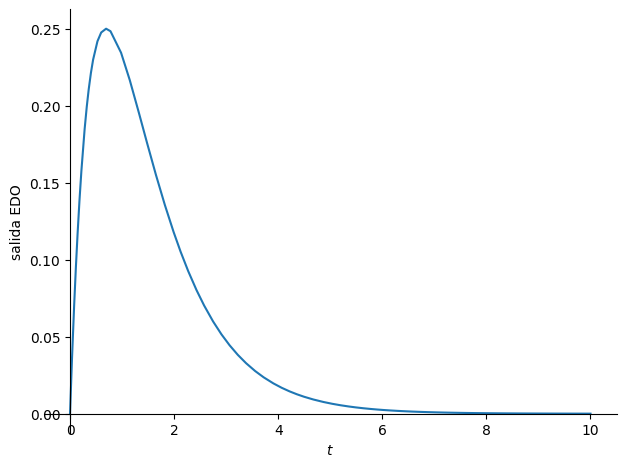

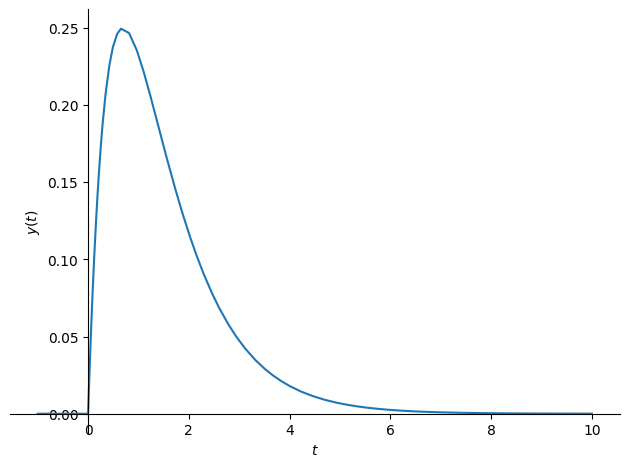

In [11]:
#Ejercicio1

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

tau = sym.symbols('tau', real=True)
y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))

'La señal de salida obtenida al resolver la EDO en el ejemplo anterior es igual a la señal de salida obtenida mediante la convolución, a continuación,'
'se grafican las dos señales.'

sym.plot(y2 ,(t,0,10) , ylabel = 'salida EDO')
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');